In [41]:
import matplotlib.pyplot as plt

from embeddings.inverse_problems.footprints.footprint_loader import load_gaussian_plume_footprint
from IPython.display import Image
from matplotlib.animation import FuncAnimation
from pathlib import Path

In [42]:
footprint = load_gaussian_plume_footprint(num_stations=20)

num_measurements = footprint.shape[0]

vmax = footprint.max()

# Animation of atmospheric transport

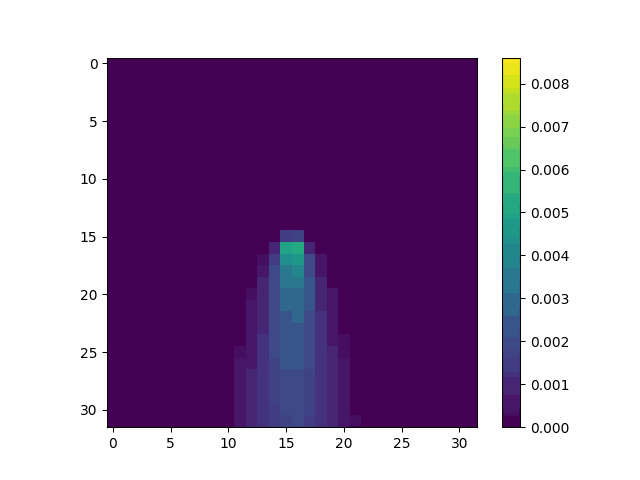

In [43]:
gif_path = Path("generated_animations") / "footprint_animation.gif"

fig, ax = plt.subplots()

image = ax.imshow(footprint[0].reshape(32, 32), vmin=0, vmax=vmax)

plt.colorbar(image)

def update(frame):
    image.set_array(footprint[frame].reshape(32, 32))
    return [image]

ani = FuncAnimation(fig, update, frames=num_measurements, blit=True, interval=100)

plt.close()

ani.save(gif_path, writer="pillow", fps=30)

Image(filename=gif_path)

# Sensitivities of all cells

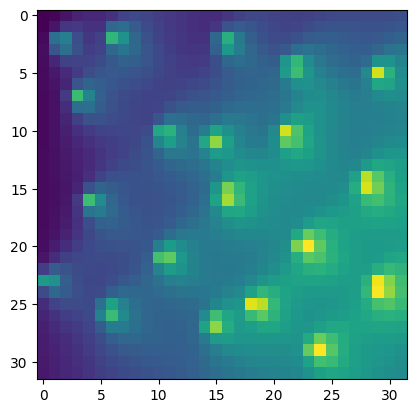

In [44]:
fig, ax = plt.subplots()

ax.imshow(footprint.sum(axis=0).reshape(32, 32))